In [1]:
from hopfield import *

In [2]:
!pip3 install tqdm

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


In [2]:
from tqdm import tqdm

In [3]:
results = []



In [3]:
import numpy as np

In [ ]:
import time

In [18]:
from tqdm.auto import tqdm  

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
def get_results(n):
    results = []
    for num_nodes in tqdm(range(1,n+1)):
        for num_images in range(0,max(2,int(num_nodes/5))):
            per_to_perturb = 10
            #working = True
            num_to_perturb = max(int(num_nodes * per_to_perturb / 100.0), 1)
            h = Hopfield(shape = (num_nodes,1))
            #print(h.values)
            h.train_on_values()
            #print(h.values)
            v  =list(h.values)

            
            for train in range(num_images-1):
                new_img = np.random.choice([-1, 1], size = num_nodes)
                h.train_on_new(new_img)

            h.perturb(num = num_to_perturb)

            times = h.sync_update_until_steady()[1]

            ham = Hopfield.hamming_distance(v,h.values)

            dict = {"nodes":num_nodes,"images":num_images+1,"perturbed":num_to_perturb, "times-took":times, "hamming":ham, "per_perturbed": per_to_perturb}
            results.append(dict)
            # if ham > 0:
            #     working = False
            
            # if working == False:
            #     break

        #print(num_nodes)        
    return results

        


In [14]:
print(dic)

[{'nodes': 2, 'images': 1, 'perturbed': 1, 'times-took': 100, 'hamming': 1}, {'nodes': 2, 'images': 2, 'perturbed': 1, 'times-took': 1, 'hamming': 2}]


In [14]:
import pandas as pd

In [77]:
dic1 = get_results(200)

100%|██████████| 200/200 [05:59<00:00,  1.80s/it]


In [5]:
dic2 = get_results(200)

 28%|██▊       | 57/200 [00:17<00:43,  3.28it/s]


KeyboardInterrupt: 

In [78]:
df = pd.DataFrame.from_dict(dic1)


In [79]:
df_1 = df[df['times-took'] != 20]
df_1 = df_1[df_1['hamming'] == 0]
df_1['wrong'] = df_1['hamming'] / df_1['nodes']

In [80]:
df_1 = df_1.loc[df_1.groupby('nodes')['images'].idxmax()]
#df.loc[df.groupby('YearReleased')['count'].idxmax()]


In [75]:
df_1

,nodes,images,perturbed,times-took,hamming,per_perturbed,wrong
1,1,2,1,1,0,10,0.0
5,4,2,1,1,0,10,0.0
7,5,2,1,1,0,10,0.0
9,6,2,1,1,0,10,0.0
11,7,2,1,1,0,10,0.0
...,...,...,...,...,...,...,...
888,96,13,9,1,0,10,0.0
901,97,12,9,1,0,10,0.0
913,98,11,9,1,0,10,0.0
925,99,11,9,3,0,10,0.0


<Axes: xlabel='nodes'>

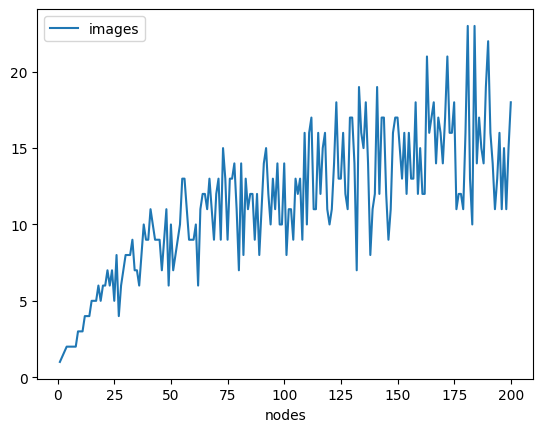

In [81]:
df_1.plot(x = "nodes", y = "images")

In [18]:
df.head()

,nodes,images,perturbed,times-took,hamming
0,1,1,1,1,1
1,1,1,1,1,0
2,1,1,1,1,1
3,1,1,1,1,0
4,1,1,1,1,0


In [ ]:
df.to_csv("data.csv")

In [24]:
df[df['nodes'] == 10]

,nodes,images,perturbed,times-took,hamming
72,10,1,1,1,0
73,10,1,2,1,0
74,10,1,3,1,0
75,10,1,4,1,0
76,10,1,5,100,5
77,10,1,6,1,0
78,10,1,7,1,0
79,10,1,8,1,0
80,10,1,9,1,10
81,10,2,1,1,0


In [15]:
df.head(20)

,nodes,images,perturbed,times-took,hamming
0,2,1,1,100,1
1,3,1,1,1,0
2,3,1,2,1,0
3,4,1,1,1,0
4,4,1,2,100,2
5,4,1,3,1,0
6,5,1,1,1,0
7,5,1,2,3,0
8,5,1,3,3,5
9,5,1,4,1,5


In [84]:
df_1.to_csv("200withstopage.csv")